<a href="https://colab.research.google.com/github/ssinlao/Assignment1/blob/main/mini_itc_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import csv

## Setup
Getting info and exploring the data

In [ ]:
filename = 'mini-itc-data.csv'

df = pd.read_csv(filename)
print('done reading')

df.info()
df.head()

done reading
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   system_name                    100 non-null    object 
 1   region                         100 non-null    object 
 2   attack_type                    100 non-null    object 
 3   data_sensitivity_level         100 non-null    int64  
 4   records_exposed                100 non-null    int64  
 5   estimated_cost_per_record_usd  100 non-null    float64
 6   estimated_total_cost_usd       100 non-null    float64
 7   detection_delay_days           100 non-null    int64  
 8   response_time_days             100 non-null    int64  
 9   notification_required          100 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB


,system_name,region,attack_type,data_sensitivity_level,records_exposed,estimated_cost_per_record_usd,estimated_total_cost_usd,detection_delay_days,response_time_days,notification_required
0,CRM,latam-south2,External Hacker,4,56681,17.91,1014973.29,18,7,Yes
1,CRM,ca-central1,Misconfiguration,4,97901,18.07,1769502.68,10,9,Yes
2,Support,africa-south1,Misconfiguration,3,16274,13.34,217074.77,3,3,Yes
3,Billing,asia-south1,Insider,5,41640,21.44,892759.36,9,4,Yes
4,HR,eu-north1,Misconfiguration,5,45484,21.09,959464.03,7,7,Yes


In [ ]:
sns.set(style="whitegrid", context="talk")

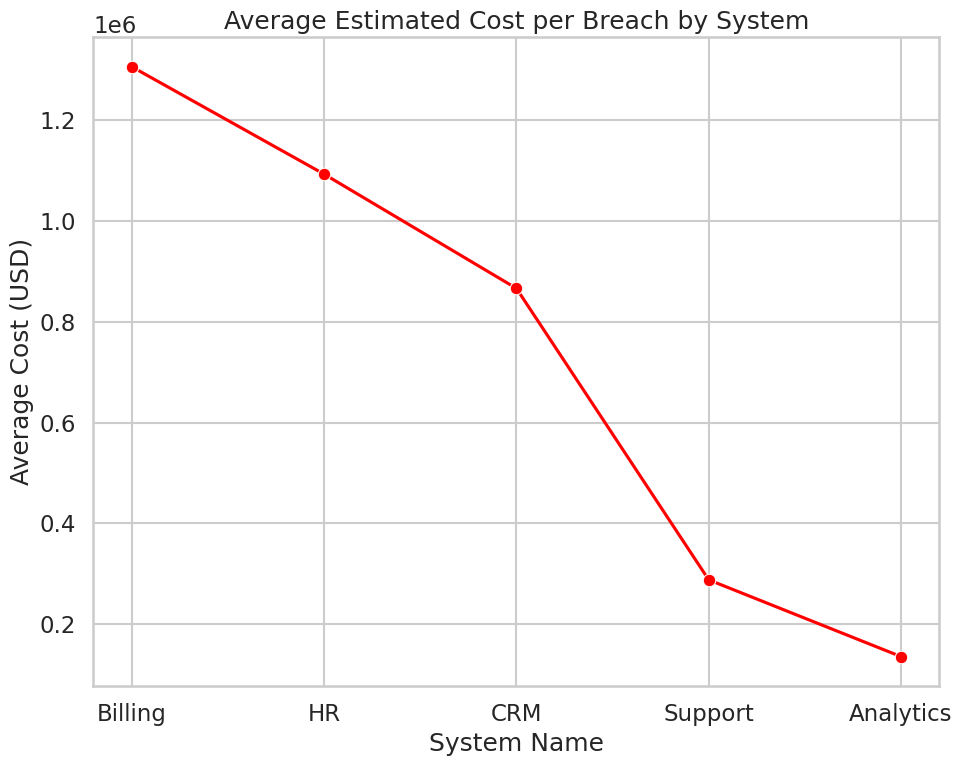

In [ ]:
# Average Estimated Cost per Breach
avg_cost = df.groupby("system_name")["estimated_total_cost_usd"].mean().reset_index()
avg_cost = avg_cost.sort_values("estimated_total_cost_usd", ascending=False)

plt.figure(figsize=(10,8))
sns.lineplot(data=avg_cost, x="system_name", y="estimated_total_cost_usd", marker="o", color="red")
plt.title("Average Estimated Cost per Breach by System")
plt.xlabel("System Name")
plt.ylabel("Average Cost (USD)")
plt.tight_layout()
plt.savefig("avg_cost_per_breach.png", dpi=300)
plt.show()

/tmp/ipython-input-250452759.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=breach_count, x="system_name", y="breach_count", palette="Blues_r")


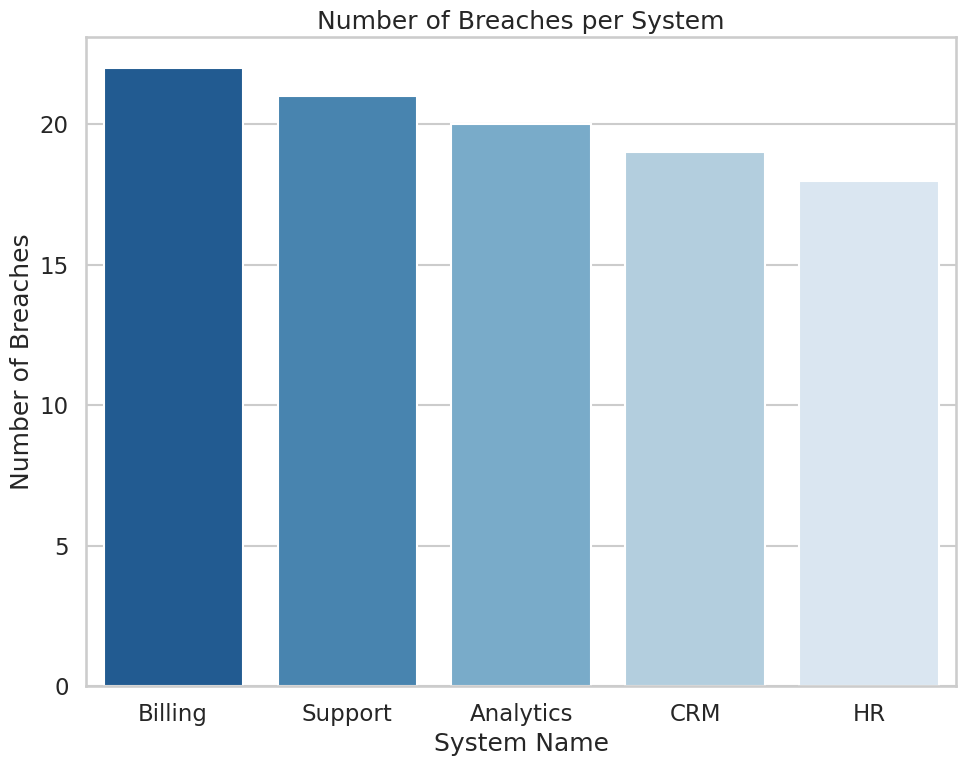

In [ ]:
# Number of Breaches per System
breach_count = df["system_name"].value_counts().reset_index()
breach_count.columns = ["system_name", "breach_count"]

plt.figure(figsize=(10,8))
sns.barplot(data=breach_count, x="system_name", y="breach_count", palette="Blues_r")
plt.title("Number of Breaches per System")
plt.xlabel("System Name")
plt.ylabel("Number of Breaches")
plt.tight_layout()
plt.savefig("num_breaches_per_system.png", dpi=300)
plt.show()

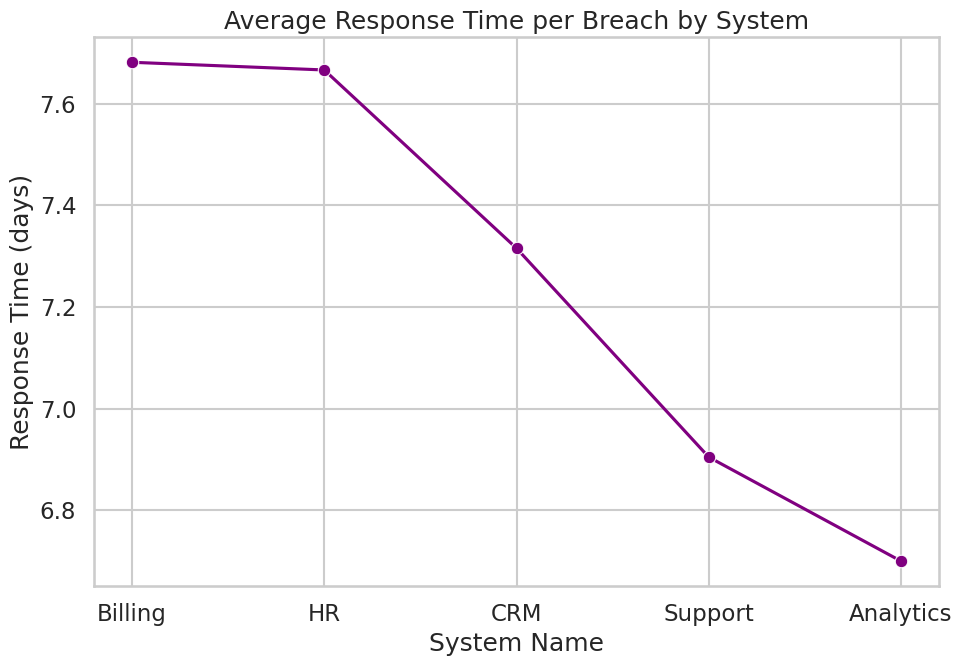

In [ ]:
# Average Response Time per Breach
avg_response = df.groupby("system_name")["response_time_days"].mean().reset_index()
avg_response = avg_response.sort_values("response_time_days", ascending=False)

plt.figure(figsize=(10,7))
sns.lineplot(data=avg_response, x="system_name", y="response_time_days", marker="o", color="purple")
plt.title("Average Response Time per Breach by System")
plt.xlabel("System Name")
plt.ylabel("Response Time (days)")
plt.tight_layout()
plt.savefig("avg_response_time_per_breach.png", dpi=300)
plt.show()

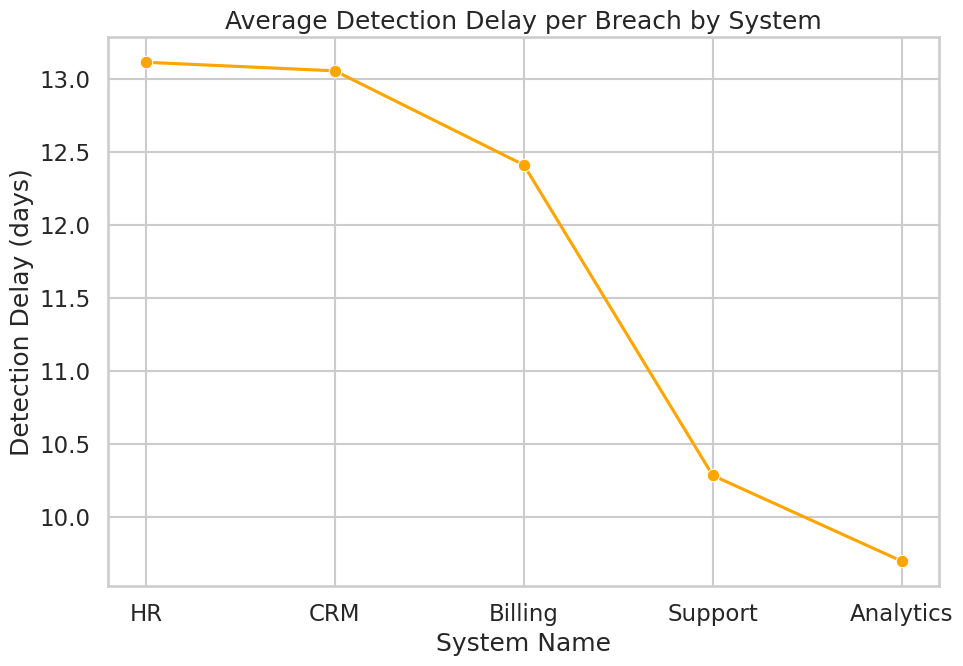

In [ ]:
# Average Detection Delay per Breach
avg_detection = df.groupby("system_name")["detection_delay_days"].mean().reset_index()
avg_detection = avg_detection.sort_values("detection_delay_days", ascending=False)

plt.figure(figsize=(10,7))
sns.lineplot(data=avg_detection, x="system_name", y="detection_delay_days", marker="o", color="orange")
plt.title("Average Detection Delay per Breach by System")
plt.xlabel("System Name")
plt.ylabel("Detection Delay (days)")
plt.tight_layout()
plt.savefig("avg_detection_delay_per_breach.png", dpi=300)
plt.show()

Model Building

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Load dataset
df = pd.read_csv("mini-itc-data.csv")

# 2. Encode categorical features
categorical_cols = ['region', 'attack_type', 'data_sensitivity_level', 'notification_required']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 3. Define features and target
X = df.drop(columns=['system_name'])
y = df['system_name']

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train a classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 7. Predict attack probabilities for each system
probs = model.predict_proba(X_test)
prob_df = pd.DataFrame(probs, columns=model.classes_)

# 8. Combine predictions with cost/delay minimization
# Normalize cost and delay
df_test = X_test.copy()
df_test['pred_system'] = y_pred
df_test['pred_prob'] = np.max(probs, axis=1)
df_test['normalized_delay'] = (df_test['detection_delay_days'] - df_test['detection_delay_days'].min()) / \
                              (df_test['detection_delay_days'].max() - df_test['detection_delay_days'].min())
df_test['normalized_cost'] = (df_test['estimated_total_cost_usd'] - df_test['estimated_total_cost_usd'].min()) / \
                             (df_test['estimated_total_cost_usd'].max() - df_test['estimated_total_cost_usd'].min())

# Define weights (tune α, β as needed)
alpha, beta = 0.4, 0.6
df_test['risk_score'] = df_test['pred_prob'] - (alpha * df_test['normalized_delay'] + beta * df_test['normalized_cost'])

# 9. Rank systems by risk_score
ranking = df_test.groupby('pred_system')['risk_score'].mean().sort_values(ascending=False)
print("System risk ranking (higher means more likely to be attacked with lower cost/delay):")
print(ranking)


              precision    recall  f1-score   support

   Analytics       1.00      0.33      0.50         3
     Billing       0.29      0.40      0.33         5
         CRM       0.67      0.50      0.57         4
          HR       0.50      0.33      0.40         6
     Support       0.40      1.00      0.57         2

    accuracy                           0.45        20
   macro avg       0.57      0.51      0.48        20
weighted avg       0.54      0.45      0.45        20

System risk ranking (higher means more likely to be attacked with lower cost/delay):
pred_system
Analytics    0.722692
Support      0.563165
CRM          0.172909
Billing      0.077773
HR          -0.099243
Name: risk_score, dtype: float64


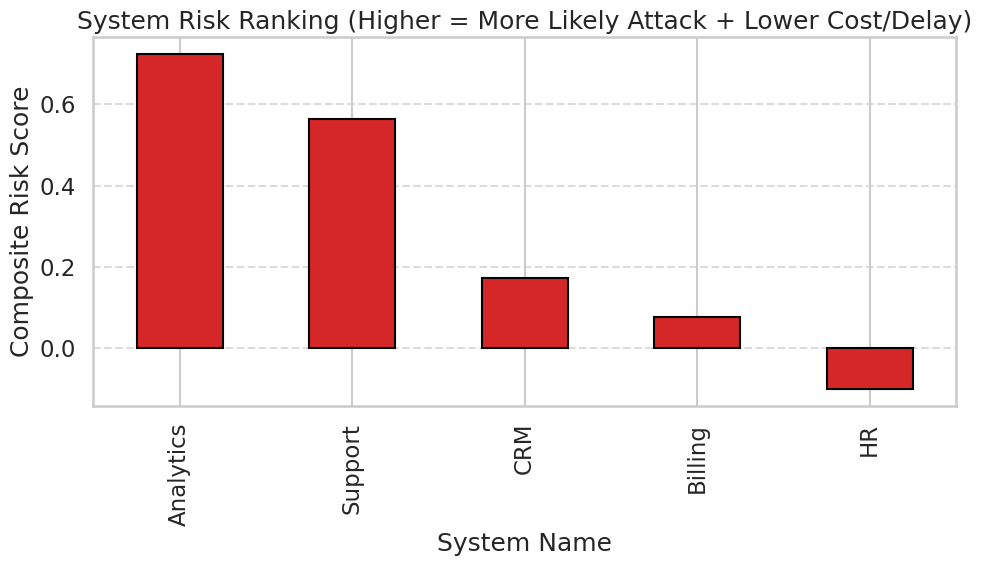

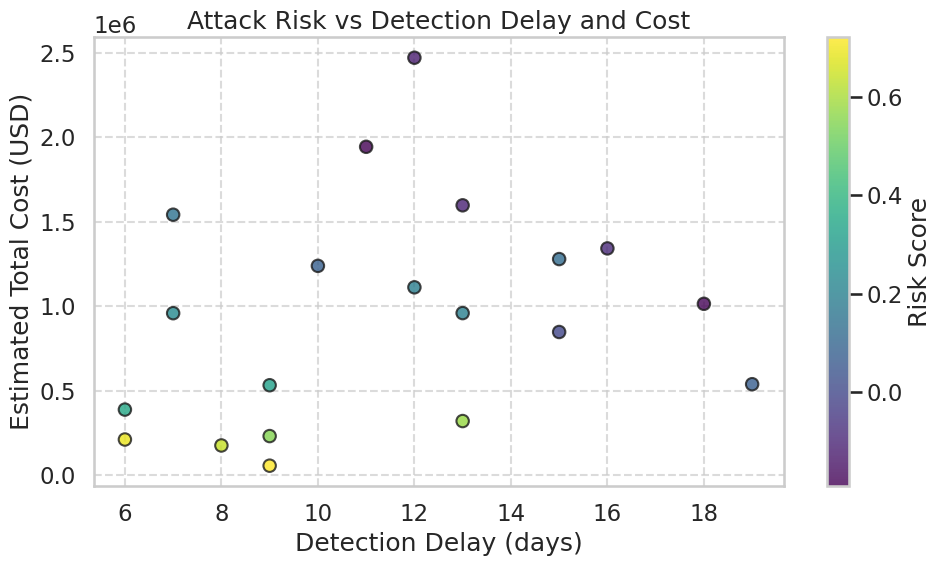


Top 5 systems most likely to be attacked (considering cost/delay):
pred_system
Analytics    0.722692
Support      0.563165
CRM          0.172909
Billing      0.077773
HR          -0.099243
Name: risk_score, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# --- Bar chart of system risk ranking ---
plt.figure(figsize=(10, 6))
ranking.plot(kind='bar', color='tab:red', edgecolor='black')
plt.title('System Risk Ranking (Higher = More Likely Attack + Lower Cost/Delay)')
plt.xlabel('System Name')
plt.ylabel('Composite Risk Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- Scatter plot: Risk Score vs Detection Delay and Cost ---
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_test['detection_delay_days'],
    df_test['estimated_total_cost_usd'],
    c=df_test['risk_score'],
    cmap='viridis',
    s=80,
    alpha=0.8,
    edgecolors='k'
)
plt.colorbar(scatter, label='Risk Score')
plt.title('Attack Risk vs Detection Delay and Cost')
plt.xlabel('Detection Delay (days)')
plt.ylabel('Estimated Total Cost (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# --- Optional: highlight top risky systems ---
top_n = 5
top_systems = ranking.head(top_n).index
print(f"\nTop {top_n} systems most likely to be attacked (considering cost/delay):")
print(ranking.head(top_n))



Correlation with estimated_total_cost_usd:

estimated_total_cost_usd         1.000000
records_exposed                  0.949670
estimated_cost_per_record_usd    0.664182
data_sensitivity_level           0.651310
notification_required            0.384602
detection_delay_days             0.290304
response_time_days               0.155072
attack_type                      0.066810
region                           0.043554
system_name                     -0.010812
Name: estimated_total_cost_usd, dtype: float64


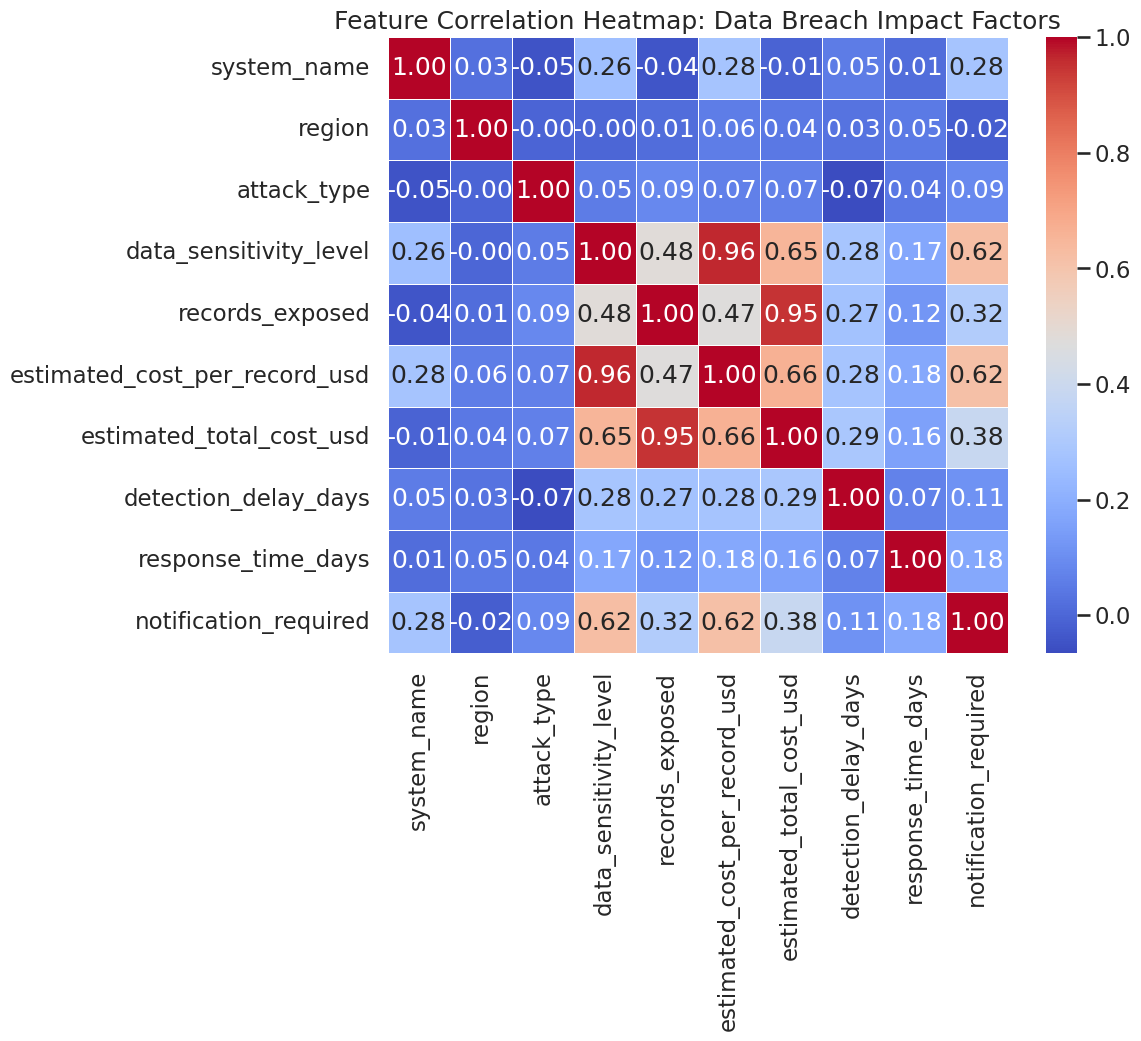

In [ ]:
categorical_cols = ['system_name', 'region', 'attack_type', 'data_sensitivity_level']
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr = df_encoded.corr(numeric_only=True)

# Display correlation of interest (with total cost)
print("\nCorrelation with estimated_total_cost_usd:\n")
print(corr['estimated_total_cost_usd'].sort_values(ascending=False))

# Create heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap: Data Breach Impact Factors")
plt.show()

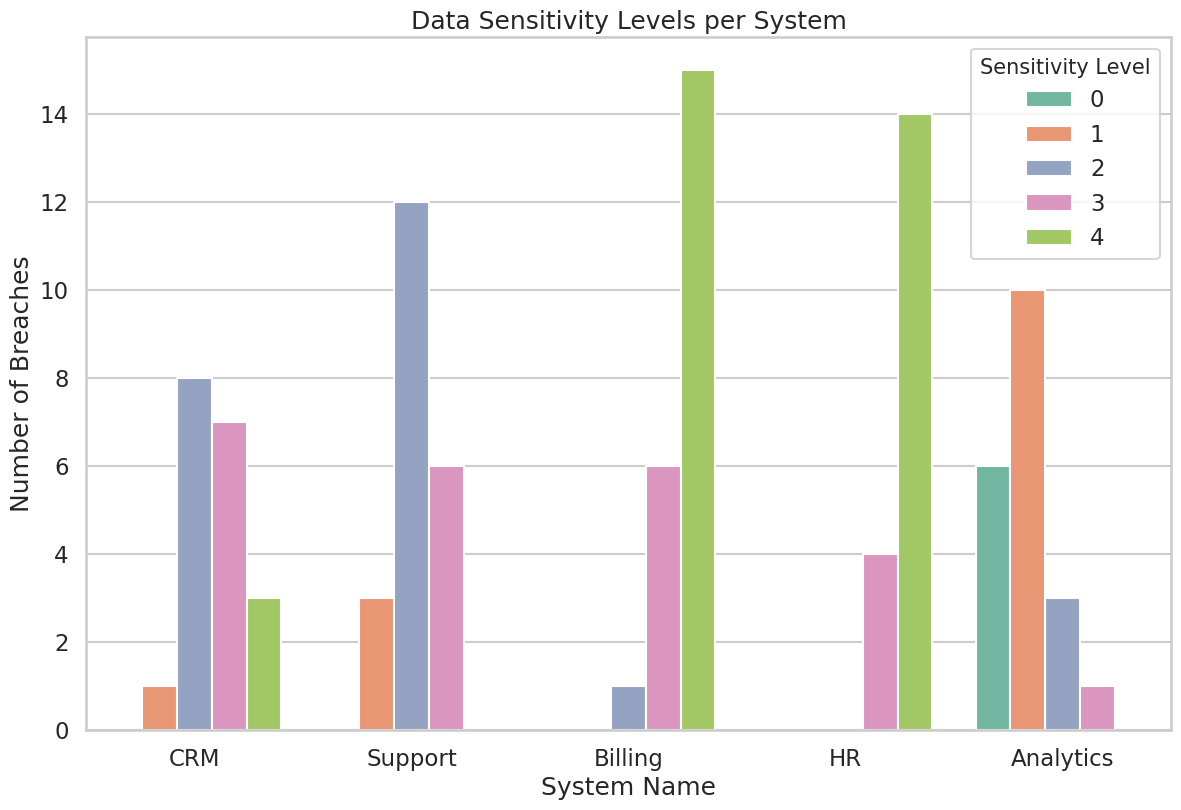

In [ ]:
plt.figure(figsize=(14,9))
sns.countplot(data=df, x='system_name', hue='data_sensitivity_level', palette='Set2')

plt.title("Data Sensitivity Levels per System")
plt.legend(title='Sensitivity Level', title_fontsize='small', loc='upper right')
plt.xlabel("System Name")
plt.ylabel("Number of Breaches")
plt.savefig("data_sens_lvl_per_system.png", dpi=300)
plt.show()

The most breaches have occurred on the Billing system and HR system which both have the highest sensitivity level

Pie chart of money lost per system





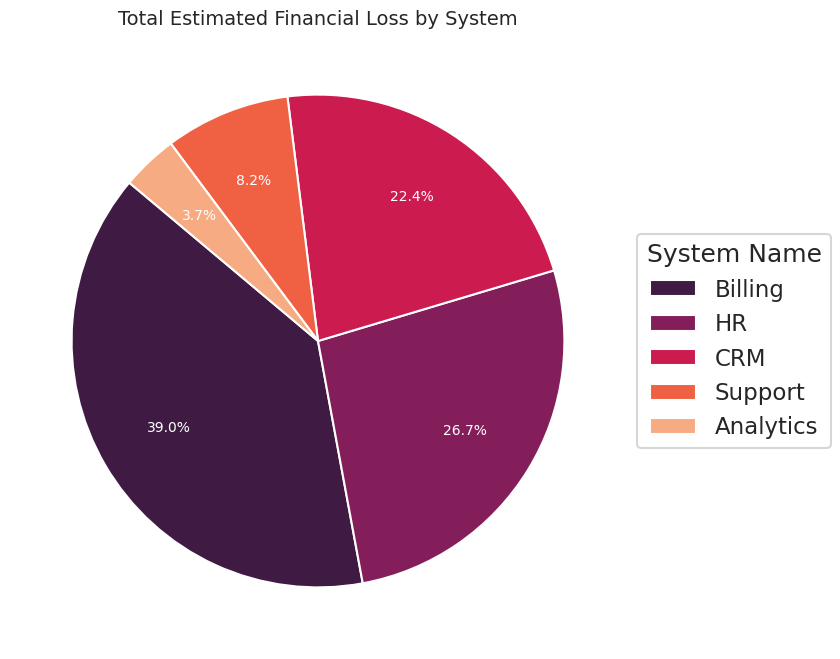

In [ ]:
loss_per_system = (
    df.groupby('system_name')['estimated_total_cost_usd']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Define colors
colors = sns.color_palette("rocket", len(loss_per_system))

# Plot pie chart
plt.figure(figsize=(12,8))
wedges, texts, autotexts = plt.pie(
    loss_per_system['estimated_total_cost_usd'],
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10, 'color': 'white'},
    pctdistance=0.7
)

plt.legend(
    wedges,
    loss_per_system['system_name'],
    title="System Name",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Total Estimated Financial Loss by System", fontsize=14)
plt.savefig("cost_by_system.png")
plt.show()

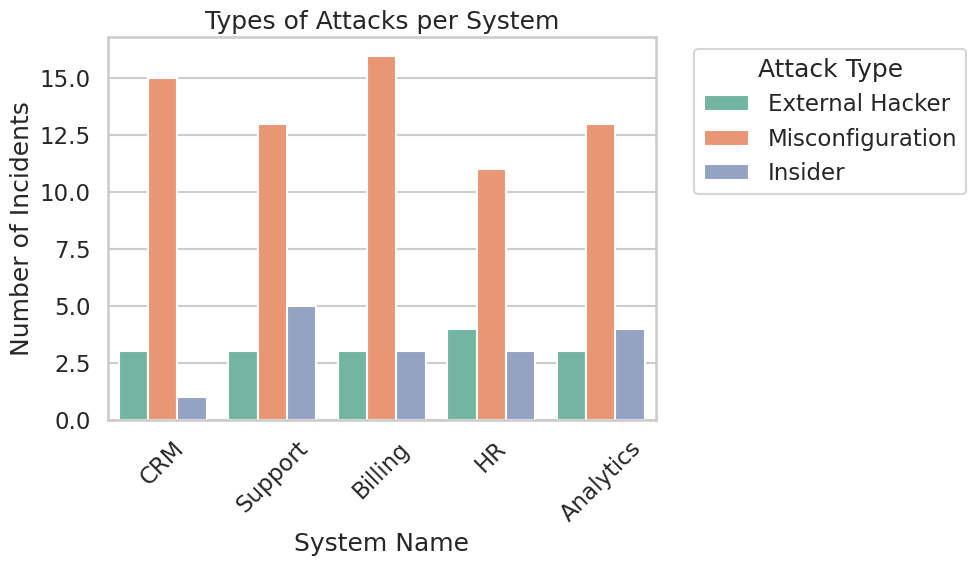

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("mini-itc-data.csv")

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='system_name', hue='attack_type', palette='Set2')

plt.title("Types of Attacks per System")
plt.xlabel("System Name")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-1928342557.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


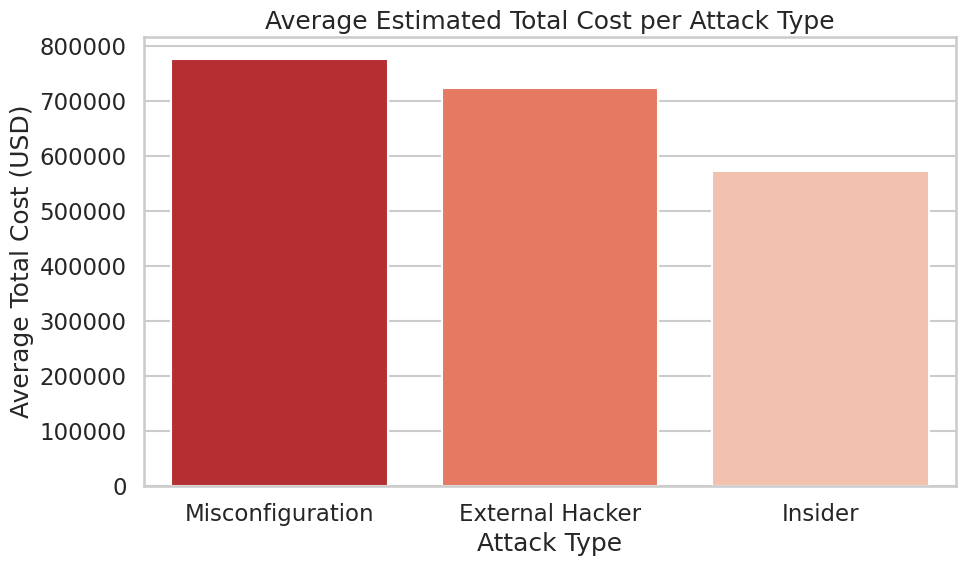

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("mini-itc-data.csv")

# Calculate average total cost per attack type
avg_cost_per_attack = (
    df.groupby('attack_type')['estimated_total_cost_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_cost_per_attack,
    x='attack_type',
    y='estimated_total_cost_usd',
    palette='Reds_r'
)

plt.title("Average Estimated Total Cost per Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Average Total Cost (USD)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2230988386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


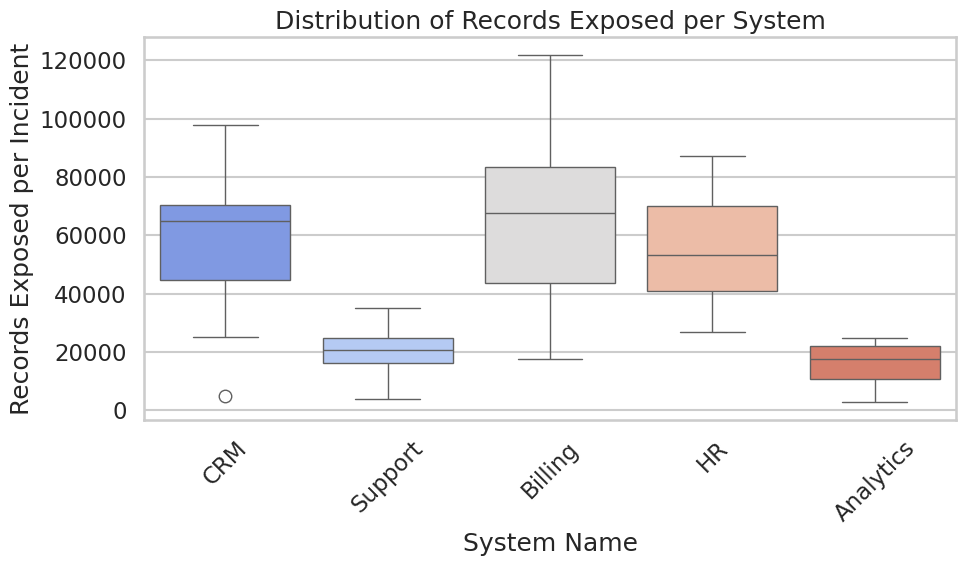

In [70]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='system_name',
    y='records_exposed',
    palette='coolwarm'
)

plt.title("Distribution of Records Exposed per System")
plt.xlabel("System Name")
plt.ylabel("Records Exposed per Incident")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

